In [6]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt
import os



DIR = r'C:\Users\user\Desktop\AI_tasks\cropped_images'

X_images = []

for imgfolder in os.listdir(DIR):
    for filename in os.listdir(DIR + '\\' + imgfolder):
        filename = DIR +'\\'+ imgfolder + '\\' + filename
        img = cv2.imread(filename)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.resize(img, (200,200))
        X_images.append(img)
      
           
X_images = np.array(X_images)
print(X_images.shape)


(274, 200, 200)


In [2]:
def show_image(image):
   plt.axis("off")
   plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
   plt.show()

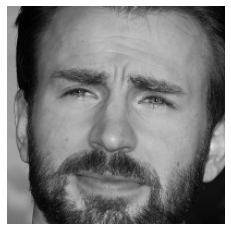

In [7]:
show_image(X_images[5])

In [8]:
labels = []

for imgfolder in os.listdir(DIR):
    for filename in os.listdir(DIR + '\\' + imgfolder):
        labels.append(imgfolder)
labels = np.array(labels)
labels.shape

(274,)

In [9]:
#check that labels match images
labels[5]

'chris_evans'

In [10]:
unique, counts = np.unique(labels, return_counts=True)
unique

array(['chris_evans', 'chris_hemsworth', 'mark_ruffalo',
       'robert_downey_jr', 'scarlett_johansson'], dtype='<U18')

In [11]:
code=[]
for label in labels: 
    for i in range(len(unique)):
        if(label==unique[i]):
            print(label+" "+str(i))
            code.append(i)
            break
code=np.array(code)


chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_evans 0
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemsworth 1
chris_hemswo

In [12]:
import tensorflow as tf
from tensorflow import keras 


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_images,code,test_size=0.2)

X_train = X_train / 255
X_test = X_test / 255
#normalize data (pixels / 255 )



In [58]:
import keras
from keras.layers import Dense
from keras.layers import Flatten
from keras.models import Sequential

model =Sequential()
model.add(Flatten(input_shape=(200, 200)))
model.add(Dense(350, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(5, activation='sigmoid'))
    



model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=40)

Epoch 1/40
7/7 [==============================] - 1s 38ms/step - loss: 37.1665 - accuracy: 0.2055
Epoch 2/40
7/7 [==============================] - 0s 6ms/step - loss: 17.7101 - accuracy: 0.2374
Epoch 3/40
7/7 [==============================] - 0s 5ms/step - loss: 9.4729 - accuracy: 0.1963
Epoch 4/40
7/7 [==============================] - 0s 6ms/step - loss: 6.7164 - accuracy: 0.2694
Epoch 5/40
7/7 [==============================] - 0s 6ms/step - loss: 5.3569 - accuracy: 0.2192
Epoch 6/40
7/7 [==============================] - 0s 6ms/step - loss: 4.1072 - accuracy: 0.3151
Epoch 7/40
7/7 [==============================] - 0s 5ms/step - loss: 2.6935 - accuracy: 0.3881
Epoch 8/40
7/7 [==============================] - 0s 6ms/step - loss: 2.3124 - accuracy: 0.4247
Epoch 9/40
7/7 [==============================] - 0s 5ms/step - loss: 2.2438 - accuracy: 0.4521
Epoch 10/40
7/7 [==============================] - 0s 5ms/step - loss: 1.3481 - accuracy: 0.5799
Epoch 11/40
7/7 [===================

In [60]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 10ms/step - loss: 0.9235 - accuracy: 0.7636


[0.9234845042228699, 0.7636363506317139]

2/2 [==============================] - 0s 7ms/step


<IPython.core.display.Javascript object>


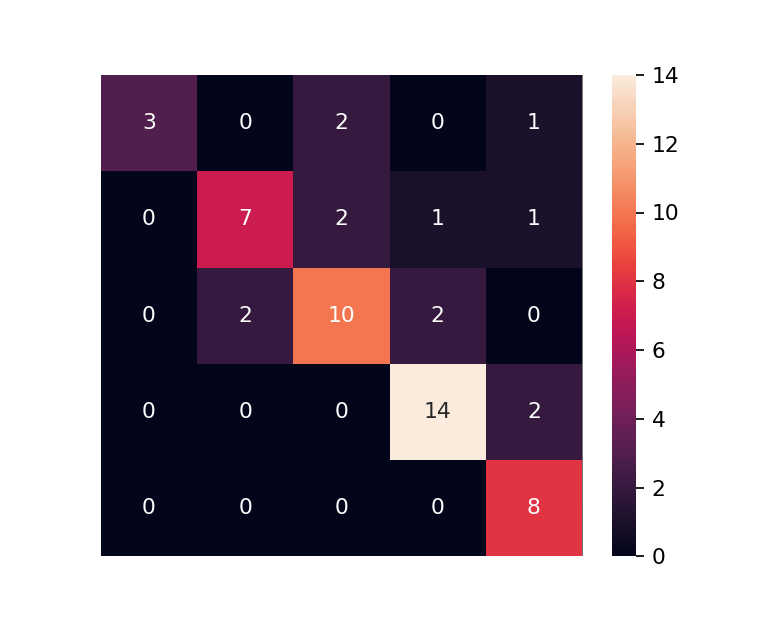

Text(33.22222222222222, 0.5, 'Truth')

In [61]:
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sn

y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (5,4))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [71]:
model.save(r"C:\Users\user\Desktop\AI_tasks\projects")

INFO:tensorflow:Assets written to: C:\Users\user\Desktop\AI_tasks\projects\assets
